In [1]:
from pass_manager_v2 import level_0_pass_manager
from mock_backend import FakeHatlab, FakeSurfaceCode
from qiskit import QuantumCircuit
from fakeutils.gate_map import *

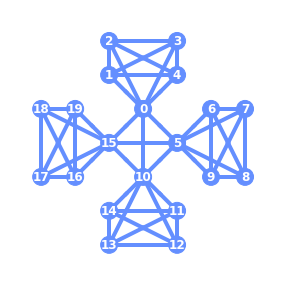

In [2]:
backend = FakeHatlab(router_as_qubits=True)
plot_gate_map(backend, qubit_coordinates=backend.qubit_coordinates)

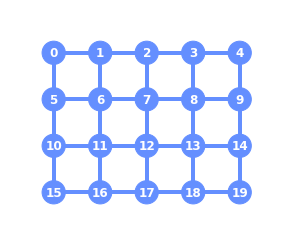

In [12]:
backend_surface = FakeSurfaceCode(twoqubitgate="iswap")
plot_gate_map(backend_surface)

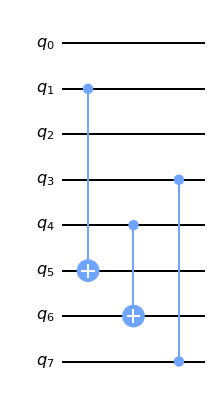

In [5]:
from qiskit.circuit.random import random_circuit
qc = random_circuit(2,2, measure=False, max_operands=2)

qc = QuantumCircuit(8)
#qc.cu3(np.pi/4, 0 , np.pi/2, 0 ,1)
qc.cx(1,5)
qc.cx(4,6)
qc.cz(3,7)
qc.draw(output='mpl')
# from qiskit.quantum_info.operators import Operator
# from fakeutils.weyl import weyl_coordinates
# x, y, z = weyl_coordinates(Operator(qc).data)
# print(x,y,z)

In [5]:
# import supermarq
# ghz = supermarq.benchmarks.qaoa_fermionic_swap_proxy.QAOAFermionicSwapProxy(num_qubits=6)
# ghz_circuit = ghz.circuit()
# qc = supermarq.features.cirq_to_qiskit(ghz_circuit)
# qc.draw(output='mpl')

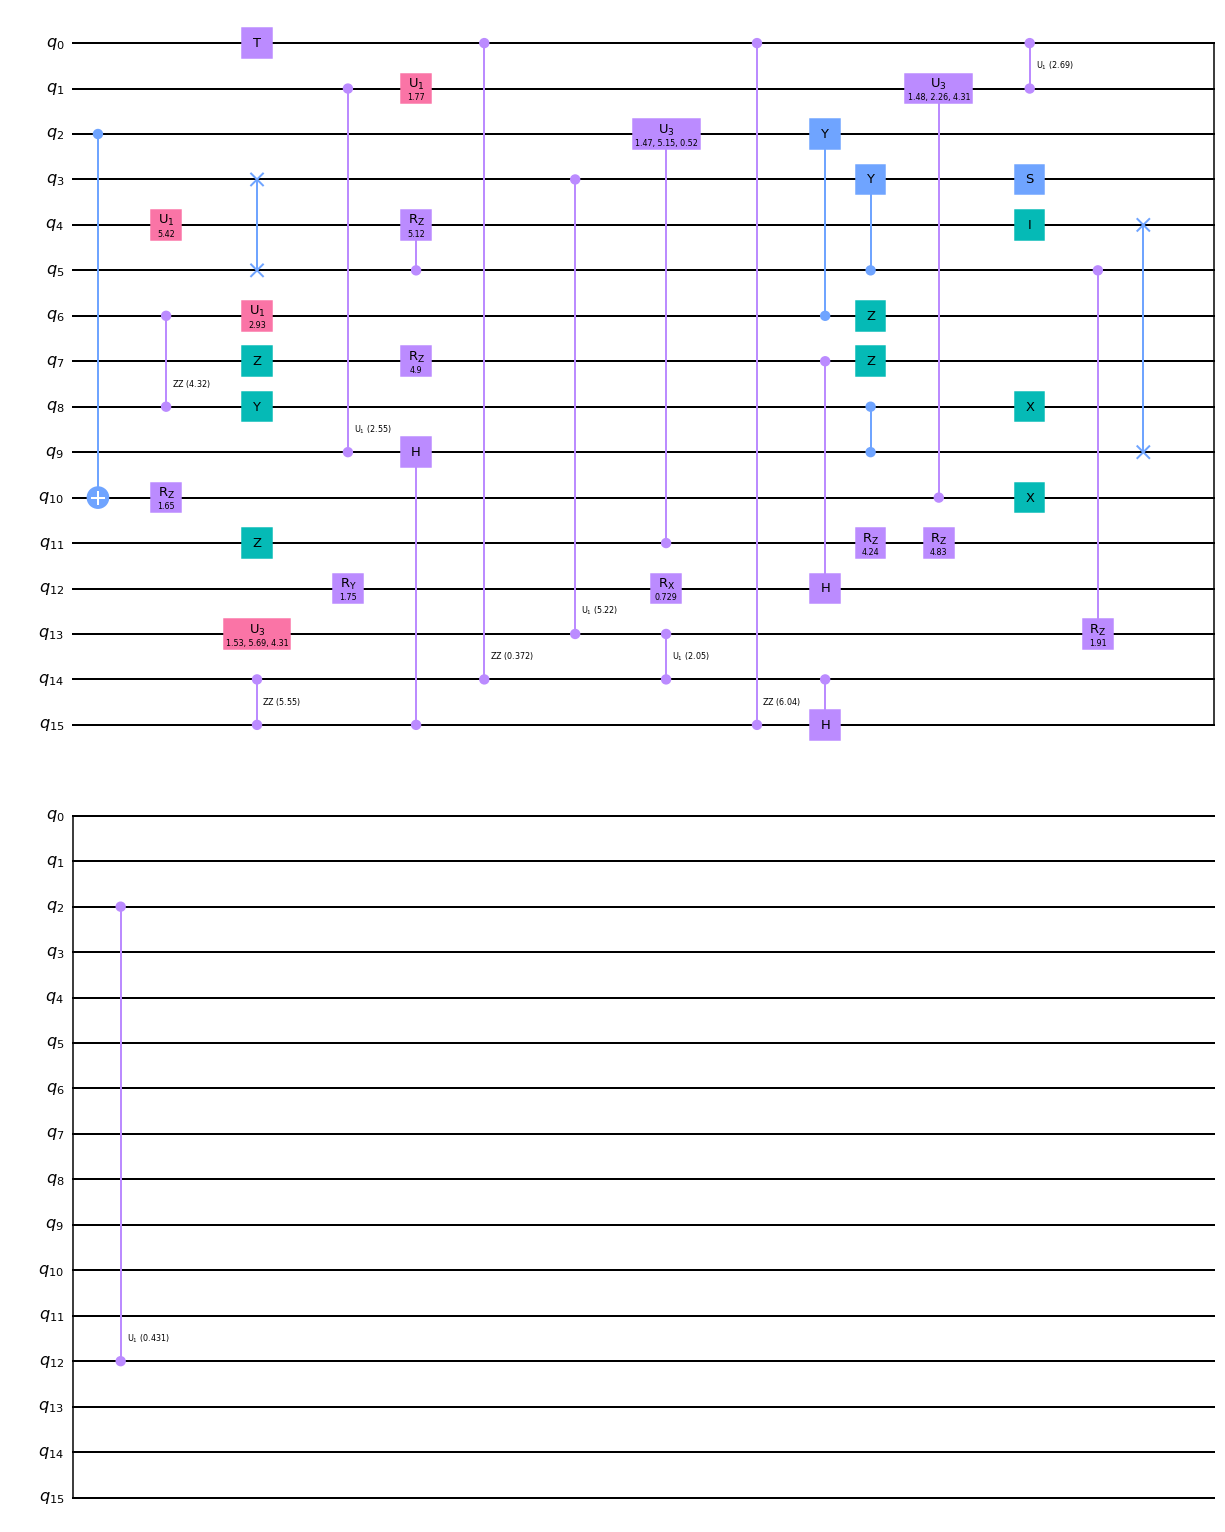

In [3]:
# from qiskit.transpiler import PassManager
# from qiskit.transpiler.passes import Collect2qBlocks, ConsolidateBlocks
# from fakeutils.riswap import RiSwapGate
# pm = PassManager()
# pm.append(Collect2qBlocks())
# pm.append(ConsolidateBlocks(kak_basis_gate=RiSwapGate(0.5), force_consolidate=True))
# pm.run(qc).draw(output='mpl')
from qiskit.circuit.random import random_circuit
qc = random_circuit(16, 4, measure=False, max_operands=2)
qc.draw(output='mpl')

/home/evm9/transpilation_EM/venv/lib/python3.8/site-packages/qiskit/transpiler/passes/optimization/consolidate_blocks.py:55: UserWarning: Only know how to decompose properly for supercontrolled basis gate. This gate is ~Ud(0.3926990816987239, 0.3926990816987239, 0.0)
  self.decomposer = TwoQubitBasisDecomposer(kak_basis_gate)
This backend's operations: cz,measure only apply to a subset of qubits. Using this property to get 'basis_gates' for the transpiler may potentially create invalid output
/home/evm9/transpilation_EM/decomp_analysis/../fakeutils/weyl_decompose.py:197: UserWarning: Only know how to decompose properly for supercontrolled basis gate. This gate is ~Ud(0.3926990816987239, 0.3926990816987239, 0.0)
  self.decomposer = TwoQubitBasisDecomposer(self.basis_gate)


Critical path duration None seconds


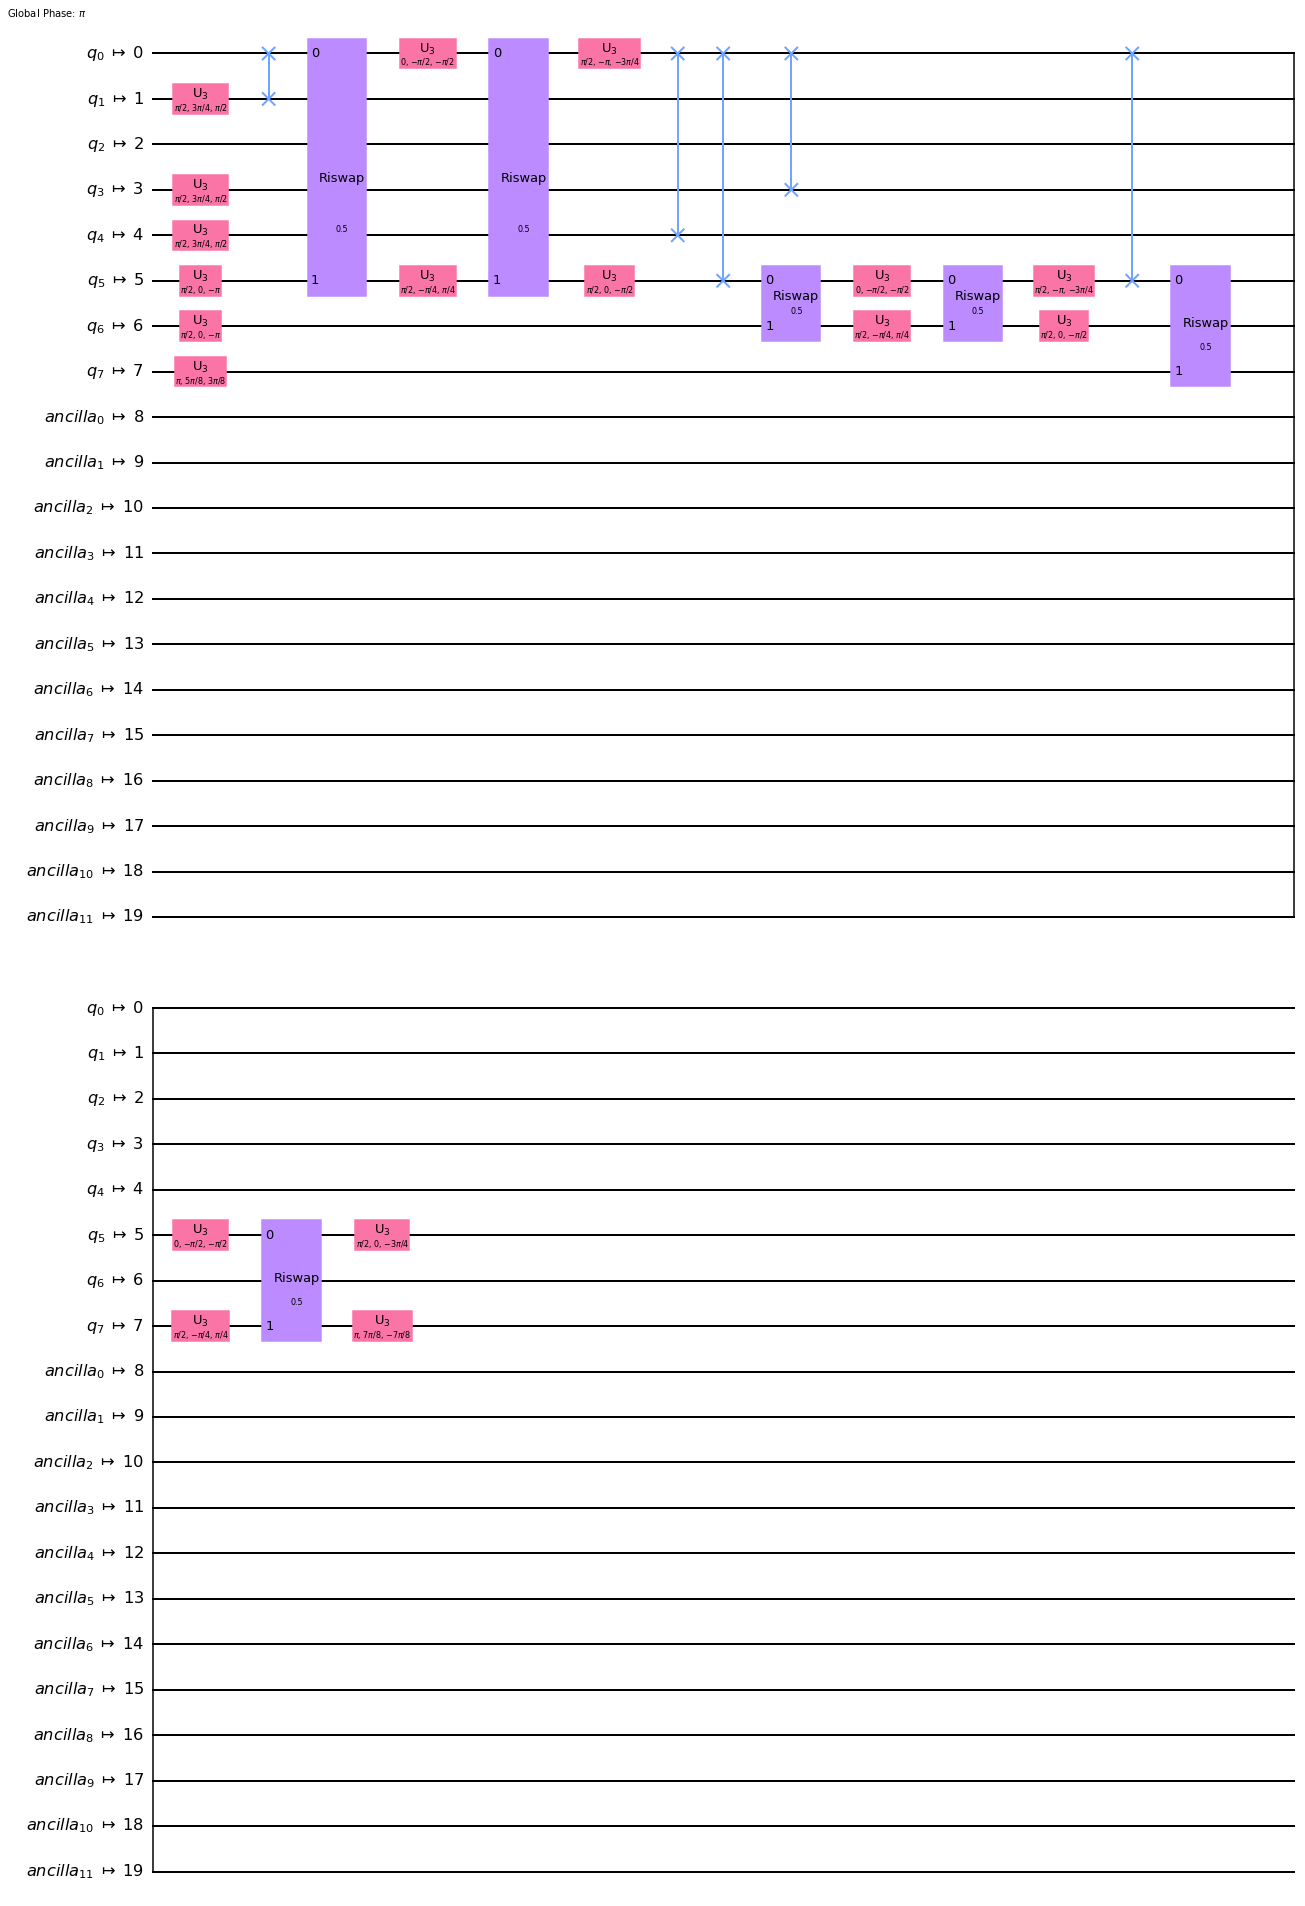

In [14]:
pm = level_0_pass_manager(backend, basis_gate="riswap", decompose_swaps=False, decompose_1q=False)
trans_circ = pm.run(qc)
print("Critical path duration", pm.property_set["duration_longest_path_length"], "seconds")
trans_circ.draw(output='mpl')
# from qiskit import schedule
# schedule(trans_circ, backend)

/home/evm9/transpilation_EM/venv/lib/python3.8/site-packages/qiskit/transpiler/passes/optimization/consolidate_blocks.py:55: UserWarning: Only know how to decompose properly for supercontrolled basis gate. This gate is ~Ud(0.3926990816987239, 0.3926990816987239, 0.0)
  self.decomposer = TwoQubitBasisDecomposer(kak_basis_gate)
/home/evm9/transpilation_EM/decomp_analysis/../fakeutils/weyl_decompose.py:197: UserWarning: Only know how to decompose properly for supercontrolled basis gate. This gate is ~Ud(0.3926990816987239, 0.3926990816987239, 0.0)
  self.decomposer = TwoQubitBasisDecomposer(self.basis_gate)


Critical path duration None seconds


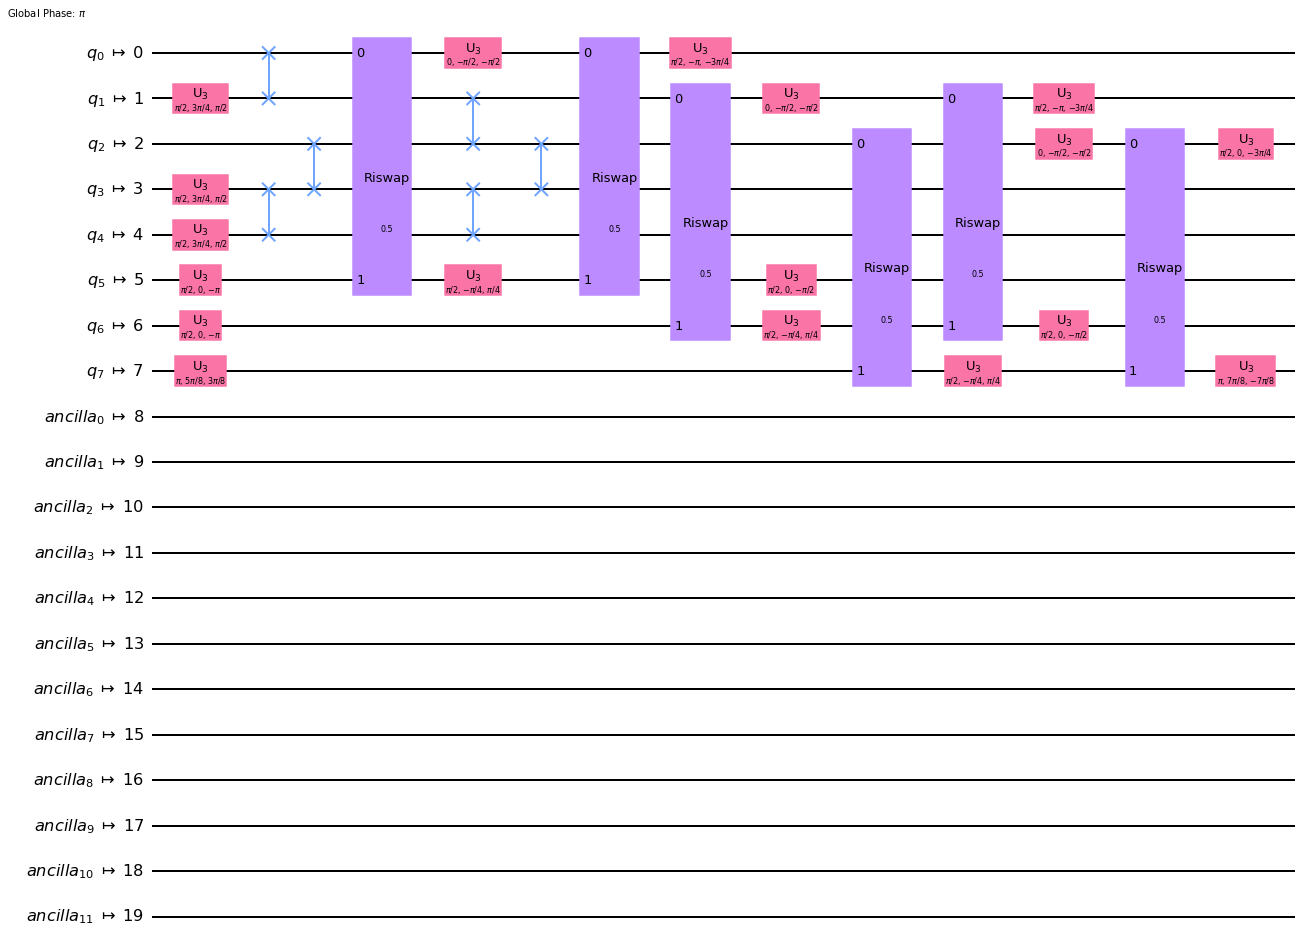

In [15]:
pm = level_0_pass_manager(backend_surface, basis_gate="riswap", decompose_swaps=False, decompose_1q=False)
trans_circ = pm.run(qc)
print("Critical path duration", pm.property_set["duration_longest_path_length"], "seconds")
trans_circ.draw(output='mpl')
# from qiskit import schedule
# schedule(trans_circ, backend)

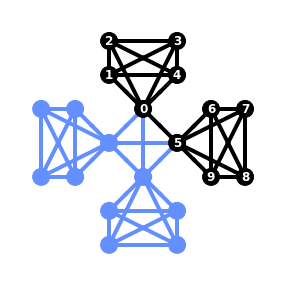

In [ ]:
plot_circuit_layout(trans_circ, backend, qubit_coordinates=backend.qubit_coordinates)

This backend's operations: cz,measure only apply to a subset of qubits. Using this property to get 'basis_gates' for the transpiler may potentially create invalid output


4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


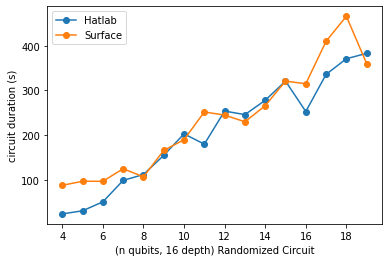

In [10]:
from qiskit.circuit.random import random_circuit
from mock_backend.fake_surfaceCode import FakeSurfaceCode
#make a plot :)
backend_hatlab = FakeHatlab(router_as_qubits=True)
pm_hatlab = level_0_pass_manager(backend_hatlab, decomp_method='weyl', decompose_swaps=True, critical_path_only=False, decompose_1q=True)

backendrswap = FakeSurfaceCode(twoqubitgate="iswap")
pm_surface = level_0_pass_manager(backendrswap, decomp_method='weyl', decompose_swaps=True, critical_path_only=False, decompose_1q=True)

hatlab_times = []
surface_times = []

q_list = range(4, 20)
for q in q_list:
    print(q)
    #crete new variable size randomized qc
    qc = random_circuit(q, 16, measure=False, max_operands=2)

    #data cx
    pm_hatlab.run(qc)
    hatlab_times.append(pm_hatlab.property_set["duration_longest_path_length"])

    #data riswap
    pm_surface.run(qc)
    surface_times.append(pm_surface.property_set["duration_longest_path_length"])

import matplotlib.pyplot as plt
plt.plot(q_list, hatlab_times, '-o', label="Hatlab")
plt.plot(q_list, surface_times, '-o', label="Surface")
plt.xlabel("(n qubits, 16 depth) Randomized Circuit")
plt.ylabel("circuit duration (s)")
plt.legend()

/home/evm9/transpilation_EM/venv/lib/python3.8/site-packages/qiskit/transpiler/passes/optimization/consolidate_blocks.py:55: UserWarning: Only know how to decompose properly for supercontrolled basis gate. This gate is ~Ud(0.3926990816987239, 0.3926990816987239, 0.0)
  self.decomposer = TwoQubitBasisDecomposer(kak_basis_gate)
This backend's operations: cz,measure only apply to a subset of qubits. Using this property to get 'basis_gates' for the transpiler may potentially create invalid output
This backend's operations: cz,measure only apply to a subset of qubits. Using this property to get 'basis_gates' for the transpiler may potentially create invalid output
/home/evm9/transpilation_EM/decomp_analysis/../fakeutils/weyl_decompose.py:197: UserWarning: Only know how to decompose properly for supercontrolled basis gate. This gate is ~Ud(0.3926990816987239, 0.3926990816987239, 0.0)
  self.decomposer = TwoQubitBasisDecomposer(self.basis_gate)


4
5
6
7
8
9
10
11
12
13
14
15


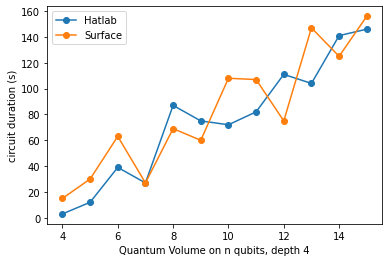

In [16]:
from qiskit.circuit.library import QuantumVolume
#make a plot :)
backend_hatlab = FakeHatlab(router_as_qubits=True)
pm_hatlab = level_0_pass_manager(backend_hatlab, basis_gate="riswap", decompose_swaps=True, decompose_1q=True)
backendrswap = FakeSurfaceCode(twoqubitgate="iswap")
pm_surface = level_0_pass_manager(backendrswap, basis_gate="riswap", decompose_swaps=True, decompose_1q=True)

hatlab_times = []
surface_times = []

q_list = range(4, 16)
for q in q_list:
    print(q)
    #crete new variable size quantum volume circuit
    qc = QuantumVolume(q, 4, 42).decompose().decompose()

    #data cx
    pm_hatlab.run(qc)
    hatlab_times.append(pm_hatlab.property_set["duration_longest_path_length"])

    #data riswap
    pm_surface.run(qc)
    surface_times.append(pm_surface.property_set["duration_longest_path_length"])

import matplotlib.pyplot as plt
plt.plot(q_list, hatlab_times, '-o', label="Hatlab")
plt.plot(q_list, surface_times, '-o', label="Surface")
plt.xlabel("Quantum Volume on n qubits, depth 4")
plt.ylabel("circuit duration (s)")
plt.legend()

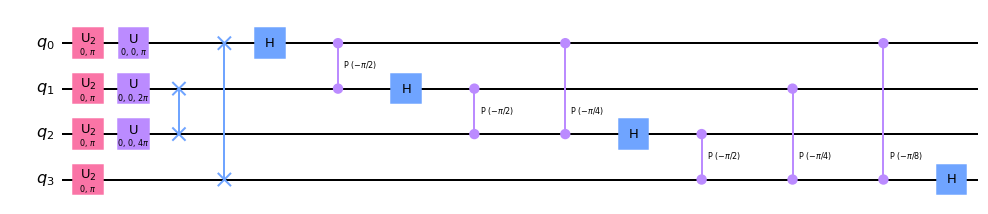

In [14]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(np.pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)
    
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit
def inverse_qft(circuit, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    # First we create a QFT circuit of the correct size:
    qft_circ = qft(QuantumCircuit(n), n)
    # Then we take the inverse of this circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the first n qubits in our existing circuit
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose() # .decompose() allows us to see the individual gates

def getQFTCircuit(nqubits=4, number=5):
    qc = QuantumCircuit(nqubits)
    for qubit in range(nqubits):
        qc.h(qubit)
    qc.p(number*np.pi/4,0)
    qc.p(number*np.pi/2,1)
    qc.p(number*np.pi,2)

    qc = inverse_qft(qc, nqubits)
    #qc.measure_all()
    return qc

qc = getQFTCircuit(4,4)
# qc = qft(QuantumCircuit(8), 8)
qc.draw(output='mpl')

This backend's operations: cz,measure only apply to a subset of qubits. Using this property to get 'basis_gates' for the transpiler may potentially create invalid output
This backend's operations: cz,measure only apply to a subset of qubits. Using this property to get 'basis_gates' for the transpiler may potentially create invalid output


4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


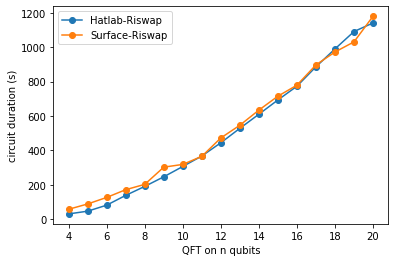

In [16]:
#make a plot :)
backend_hatlab = FakeHatlab(router_as_qubits=True)
pm_hatlab = level_0_pass_manager(backend_hatlab, decomp_method='weyl', decompose_swaps=True, critical_path_only=False, decompose_1q=True)

backendrswap = FakeSurfaceCode(twoqubitgate="iswap")
pm_surface_swap = level_0_pass_manager(backendrswap, decomp_method='weyl', decompose_swaps=True, critical_path_only=False, decompose_1q=True)

backendcx = FakeSurfaceCode(twoqubitgate="cx")
pm_surface_cx = level_0_pass_manager(backendcx, decomp_method='cx', decompose_swaps=True, critical_path_only=False, decompose_1q=True)

hatlab_times = []
surface_swap_times = []
surface_cx_times = []

q_list = range(4, 21)
for q in q_list:
    print(q)
    #crete new QFT circuit of variable qubit size
    qc = getQFTCircuit(q,4)

    #data hatlab
    pm_hatlab.run(qc)
    hatlab_times.append(pm_hatlab.property_set["duration_longest_path_length"])

    #data riswap
    pm_surface_swap.run(qc)
    surface_swap_times.append(pm_surface_swap.property_set["duration_longest_path_length"])

    # #data cx
    # pm_surface_cx.run(qc)
    # surface_cx_times.append(pm_surface_cx.property_set["duration_longest_path_length"])

import matplotlib.pyplot as plt
plt.plot(q_list, hatlab_times, '-o', label="Hatlab-Riswap")
plt.plot(q_list, surface_swap_times, '-o', label="Surface-Riswap")
# plt.plot(q_list, surface_cx_times, '-o', label="Surface-CX")

plt.xlabel("QFT on n qubits")
plt.ylabel("circuit duration (s)")
plt.legend()

In [ ]:
#DEBUGGING
# qc = getQFTCircuit(4,4)
# # backend_hatlab = FakeHatlab(router_as_qubits=True)
# # pm_hatlab = level_0_pass_manager(backend_hatlab, decomp_method='weyl', decompose_swaps=False, critical_path_only=False, decompose_1q=False)
# #data cx
# #qc1 = pm_hatlab.run(qc)

# # backendrswap = FakeSurfaceCode(twoqubitgate="iswap")
# # pm_surface = level_0_pass_manager(backendrswap, decomp_method='weyl', decompose_swaps=True, critical_path_only=False, decompose_1q=True)
# #data riswap
# #qc2 = pm_surface.run(qc)


# backendcx = FakeSurfaceCode(twoqubitgate="cx")
# pm_surface_cx = level_0_pass_manager(backendcx, decomp_method='cx', decompose_swaps=True, critical_path_only=False, decompose_1q=True)
# qc3 = pm_surface_cx.run(qc)
# qc3.draw(output='mpl')